In [120]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [49]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [50]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [51]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
market_scaled = scaler.fit_transform(df_market_data)
market_scaled = pd.DataFrame(market_scaled, columns = df_market_data.columns, )
market_scaled.head() 

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [52]:
# Create a DataFrame with the scaled data
market_scaled_df = pd.DataFrame(market_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original data

# Set the coinid column as index
market_scaled_df = market_scaled_df.set_index(df_market_data.index)

# Display sample data
market_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [107]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
# Create a list with the number of k-values from 1 to 11
inertia = []

for k in range (1,11):
    cluster = KMeans(n_clusters=k) # n_clusters means the number of clustrs groups that is going to train the model
    cluster.fit(market_scaled_df) #Train the model
    inertia.append(cluster.inertia_) 


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:>

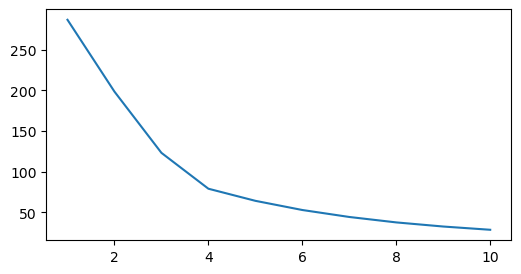

In [108]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_series = pd.Series(inertia, index=range(1,11))
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_series.plot(figsize=(6,3))

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [110]:
# Initialize the K-Means model using the best value for k
cluster = KMeans(n_clusters=4, random_state=1) # n_clusters means the number of clustrs groups that is going to train the model

In [111]:
# Fit the K-Means model using the scaled data
cluster.fit(market_scaled_df) #Train the model


KMeans(n_clusters=4, random_state=1)

In [113]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster.predict(market_scaled_df)

# Print the resulting array of cluster values.


array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [114]:
# Create a copy of the DataFrame
df_copy = market_scaled_df.copy()

In [115]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['cluster'] = cluster.predict(market_scaled_df)

# Display sample data
df_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [116]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

original_data = df_copy.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='cluster', hover_cols=market_scaled_df.index.name)
original_data

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [61]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [62]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_pca = pca.fit_transform(market_scaled_df)
# View the first five rows of the DataFrame. 
market_pca

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [63]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
sum(pca.explained_variance_ratio_)

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [64]:
# Create a new DataFrame with the PCA data.


# Creating a DataFrame with the PCA data
market_PCA = pd.DataFrame({
    'PC1': market_pca[:,0],
    'PC2': market_pca[:,1],
    'PC3': market_pca[:,2],
    
    })
market_PCA
# Copy the crypto names from the original data


# Set the coinid column as index
market_PCA = market_PCA.set_index(df_market_data.index)

# Display sample data
market_PCA.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [66]:
# Create a list with the number of k-values from 1 to 11


In [70]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in range (1,11):
    cluster = KMeans(n_clusters=k) # n_clusters means the number of clustrs groups that is going to train the model
    cluster.fit(market_PCA) #Train the model
    inertia.append(cluster.inertia_) 

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


<AxesSubplot:>

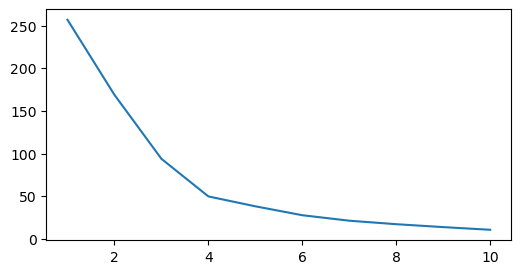

In [93]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_series_pca = pd.Series(inertia, index=range(1,11))
elbow_series_pca.plot(figsize=(6,3))

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** NO

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [128]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=1)


In [129]:
# Fit the K-Means model using the PCA data
k_model.fit(market_PCA)


KMeans(n_clusters=4, random_state=1)

In [130]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_predictions = k_model.predict(market_PCA)
# Print the resulting array of cluster values.
k_predictions

array([1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 0, 1, 1, 3, 2, 1, 3, 3, 3])

In [131]:
# Create a copy of the DataFrame with the PCA data
market_PCA

# Add a new column to the DataFrame with the predicted clusters
market_PCA['cluster'] = k_predictions

# Display sample data
market_PCA.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [132]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

MARKET_plot_pca = market_PCA.hvplot.scatter(x='PC1', y='PC2', by='cluster', hover_cols=market_PCA.index.name)
MARKET_plot_pca

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

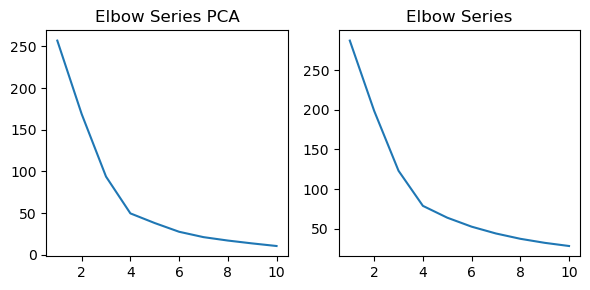

In [122]:
# Composite plot to contrast the Elbow curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the Elbow Series PCAt on the first subplot
elbow_series_pca.plot(ax=ax1, figsize=(6, 3))
ax1.set_title("Elbow Series PCA")

# Plot the Elbow Series on the second subplot
elbow_series.plot(ax=ax2, figsize=(6, 3))
ax2.set_title("Elbow Series")

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


In [142]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
# Combine the two plots into a composite plot using the + operator
composite_plot = MARKET_plot_pca + original_data

# Display the composite plot
composite_plot






:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Maybe I didnt use the PCA in the correct way, however I have a better undertanding of the cluster withou using the PCA